# **Get Dataset**

In [1]:
# obtaining the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p /content/data
!unzip /content/drive/MyDrive/OMAPS_dataset/OMAPS2.zip -d /content/data

Archive:  /content/drive/MyDrive/OMAPS_dataset/OMAPS2.zip
   creating: /content/data/OMAPS2/aligned_audio_align_221225/
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_02.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_03.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_04.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/01_05.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_02.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_03.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_04.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/02_05.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/03_01.txt  
  inflating: /content/data/OMAPS2/aligned_audio_align_221225/03_02.txt  
  in

In [3]:
!ls /content/data/OMAPS2/

aligned_audio_align_221225  aligned_video_align_221225	test  train  valid


In [4]:
!ls /content/data/OMAPS2/train/

video  wav


In [5]:
!ls /content/data/OMAPS2/train/wav

01_05.wav  08_02.wav  14_01.wav  19_03.wav	  yty20_2x8_7.wav  yty22_1x5_1.wav  yty26_3x5_1.wav
02_01.wav  08_03.wav  14_02.wav  19_04.wav	  yty20_3x8_1.wav  yty22_1x5_2.wav  yty26_3x5_3.wav
02_02.wav  08_04.wav  14_03.wav  19_05.wav	  yty20_3x8_4.wav  yty22_2x5_1.wav  yty26_3x5_5.wav
02_03.wav  09_01.wav  14_04.wav  20_01.wav	  yty20_3x8_5.wav  yty22_2x5_2.wav  yty3_1.wav
02_04.wav  09_02.wav  14_05.wav  20_02.wav	  yty20_3x8_7.wav  yty22_2x5_5.wav  yty3_2.wav
02_05.wav  09_04.wav  15_01.wav  20_03.wav	  yty20_4x7_3.wav  yty2_2.wav	    yty3_4.wav
03_02.wav  09_06.wav  15_02.wav  20_04.wav	  yty20_4x7_4.wav  yty2_4.wav	    yty3_5.wav
03_04.wav  10_01.wav  15_03.wav  20_05.wav	  yty20_4x7_5.wav  yty2_5.wav	    yty4_1.wav
03_05.wav  10_04.wav  15_05.wav  playing2.wav	  yty20_4x7_6.wav  yty26_1x7_1.wav  yty4_2.wav
04_01.wav  11_01.wav  16_01.wav  playing3.wav	  yty20_4x7_7.wav  yty26_1x7_2.wav  yty4_3.wav
04_02.wav  11_03.wav  16_02.wav  yty1_2.wav	  yty20_5x7_1.wav  yty26_1x7_3.wav  yty4_

In [6]:
import os
from scipy.io import wavfile
import numpy as np
import librosa

In [7]:
folder_path_train = "/content/data/OMAPS2/train/wav/"
files_train = os.listdir(folder_path_train)

print(files_train)

folder_path_val = "/content/data/OMAPS2/valid/wav/"
files_val = os.listdir(folder_path_val)

print(files_val)

folder_path_test = "/content/data/OMAPS2/test/wav/"
files_test = os.listdir(folder_path_test)

print(files_test)

['yty20_3x8_7.wav', '15_02.wav', '15_05.wav', 'yty26_3x5_3.wav', 'yty5_4.wav', 'yty5_1.wav', 'yty20_5x7_2.wav', '06_03.wav', 'yty20_1x7_4.wav', 'yty3_5.wav', '14_03.wav', 'yty1_4.wav', '12_05.wav', 'yty20_4x7_5.wav', 'yty22_1x5_1.wav', 'yty20_5x7_1.wav', '20_04.wav', '06_04.wav', '02_03.wav', '19_05.wav', '13_01.wav', '09_01.wav', 'yty26_2x8_5.wav', 'yty5_2.wav', 'yty26_1x7_3.wav', '19_04.wav', '12_02.wav', 'yty26_2x8_1.wav', '10_04.wav', 'yty26_2x8_7.wav', '10_01.wav', '09_02.wav', '15_01.wav', 'yty5_5.wav', '20_02.wav', '18_02.wav', '19_01.wav', '19_02.wav', '09_04.wav', '19_03.wav', '16_05.wav', 'yty3_1.wav', '03_05.wav', 'yty22_1x5_2.wav', '15_03.wav', '07_03.wav', 'yty2_4.wav', 'yty4_1.wav', 'yty20_2x8_7.wav', '08_03.wav', 'yty26_1x7_6.wav', 'zyn3.wav', 'yty26_1x7_2.wav', 'yty3_4.wav', 'yty1_2.wav', 'yty26_1x7_5.wav', '08_02.wav', 'zyn1.wav', '06_05.wav', 'yty20_3x8_4.wav', 'zyn2.wav', '13_02.wav', 'yty26_2x8_2.wav', 'yty26_3x5_1.wav', 'yty4_5.wav', 'yty26_2x8_4.wav', '14_01.wav',

# **Preprocessing**

In [8]:
# Constants for processing parameters
HOP_LENGTH = 512
N_BINS = 252
BINS_PER_OCTAVE = 36
NUM_NOTES = 88
MAX_SAMPLES_PER_FILE = 4000000

# Training, validation, and test sets
train_features, train_labels = [], []
val_features, val_labels = [], []
test_features, test_labels = [], []
train_count = 0
val_count = 0
test_count = 0

def preprocess(files, feature_storage, label_storage, count, folder_path):
    """
    Processes a list of audio files, extracts their CQT features, aligns them with ground truth labels,
    and stores them in feature and label storage lists.

    Args:
        files (list): List of file names to process.
        feature_storage (list): The list to store CQT features.
        label_storage (list): The list to store label matrices.
        count (int): Counter to keep track of the number of files processed.
        folder_path (str): Path to the folder containing the audio files.

    Returns:
        int: The updated count of processed files.
    """
    for filename in files:
        # Load audio file and calculate window length
        sampling_freq, stereo_vector = wavfile.read(folder_path + filename)
        window_length = HOP_LENGTH / float(sampling_freq)

        # Convert audio to float type and extract CQT features
        float_array = stereo_vector / 1.0
        cqt_features = np.abs(librosa.cqt(float_array, sr=sampling_freq, hop_length=HOP_LENGTH, n_bins=N_BINS, bins_per_octave=BINS_PER_OCTAVE)).T

        # Determine the number of frames and create a time vector
        num_frames = cqt_features.shape[0]
        time_vector = np.arange(1, num_frames + 1) * window_length

        # Initialize binary label matrix with dimensions (frames, notes)
        labels = np.zeros((num_frames, NUM_NOTES))

        # Read and process aligned labels from the corresponding text file
        folder_path_label = "/content/data/OMAPS2/aligned_audio_align_221225/"
        label_file_path = os.path.join(folder_path_label, f"{filename.split('.')[0]}.txt")
        with open(label_file_path, "r") as file:
          lines = file.read().split("\n")

        for line in lines:
            if line.strip():
                start, end, pitch, velocity = map(float, line.split('\t')[:4])
                pitch = int(pitch) - 21  # Adjust pitch to the 0-87 range
                start_idx = np.where(time_vector >= start)[0]
                end_idx = np.where(time_vector > end)[0]

                if start_idx.size and end_idx.size:
                    labels[start_idx[0]:end_idx[0], pitch] = 1

        # Ensure files don't exceed the maximum allowed samples per file
        while (len(feature_storage) + len(cqt_features)) >= MAX_SAMPLES_PER_FILE:
            to_add = MAX_SAMPLES_PER_FILE - len(feature_storage)
            feature_storage.extend(cqt_features[:to_add, :])
            label_storage.extend(labels[:to_add, :])

            feature_storage_np = np.array(feature_storage)
            label_storage_np = np.array(label_storage)

            count += 1
            feature_storage = []
            label_storage = []
            cqt_features = cqt_features[to_add:, :]
            labels = labels[to_add:, :]

        # Add remaining CQT features and labels if less than the max allowed
        if len(cqt_features) == MAX_SAMPLES_PER_FILE:
            feature_storage.extend(cqt_features)
            label_storage.extend(labels)
            feature_storage_np = np.array(feature_storage)
            label_storage_np = np.array(label_storage)

            count += 1
            feature_storage = []
            label_storage = []
        elif len(cqt_features) > 0:
            feature_storage.extend(cqt_features)
            label_storage.extend(labels)

    return count


In [9]:
train_count = preprocess(files_train, train_features, train_labels, train_count, folder_path_train)
test_count = preprocess(files_test, test_features, test_labels, test_count, folder_path_test)
val_count = preprocess(files_val, val_features, val_labels, val_count, folder_path_val)

In [10]:
print(len(train_features), len(train_labels))
print(len(test_features), len(test_labels))
print(len(val_features), len(val_labels))

533087 533087
140661 140661
83243 83243


# Normalization

In [11]:
# Get the minimum and maximum values from the X values in the training set
max_train = max(max(val) for val in train_features)
min_train = min(min(val) for val in train_features)
min_train, max_train

(3.245034542981351e-05, 796850.8240814671)

In [12]:
# Normalize each X value in the training set for every single frame (but this one hasnt taken into account the mean)
initial_norm_train_features = [[(x - min_train) / (max_train - min_train) for x in inner_list] for inner_list in train_features]

In [13]:
# Calculate the mean of the normalized values
flattened_normalized_X_train = [value for sublist in initial_norm_train_features for value in sublist]
train_mean = sum(flattened_normalized_X_train) / len(flattened_normalized_X_train)

In [14]:
train_mean

0.0023727251011984338

In [15]:
# Normalize each X value in the training set for every single frame
norm_train_X = [[value - train_mean for value in sublist] for sublist in initial_norm_train_features]

# Normalize each X value in the validation set for every single frame
norm_val_X = [[value - train_mean for value in sublist] for sublist in val_features]

# Normalize each X value in the test set for every single frame
norm_test_X = [[value - train_mean for value in sublist] for sublist in test_features]


In [16]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_train = max(max(val) for val in norm_train_X)
min_train_norm_train = min(min(val) for val in norm_train_X)
min_train_norm_train, max_train_norm_train

(-0.0023727251011984338, 0.9976272748988015)

In [17]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_val = max(max(val) for val in norm_val_X)
min_train_norm_val = min(min(val) for val in norm_val_X)
max_train_norm_val, min_train_norm_val

(342831.61232856975, -0.0017180658786782243)

In [19]:
# Get the minimum and maximum values from the X values in the training set
max_train_norm_test = max(max(val) for val in norm_test_X)
min_train_norm_test = min(min(val) for val in norm_test_X)
max_train_norm_test, min_train_norm_test

(360672.3976635917, -0.0016798117334346535)

#Baseline DNN Model

In [ ]:
!pip install -q -U tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

default_gpu = tf.test.gpu_device_name()
if default_gpu:
    print(f"Default GPU Device: {default_gpu}")
else:
    print("Please install GPU version of TensorFlow.")
num_gpus = len(tf.config.list_physical_devices('GPU'))
print(f"Num GPUs Available: {num_gpus}")


Default GPU Device: /device:GPU:0
Num GPUs Available:  1


In [ ]:
#MODEL TRAINING WITHOUT ANY HYPERPARAMS ONLY LR
import numpy as np
import pandas as pd
import threading
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History, ModelCheckpoint
import keras
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
np.random.seed(999)

def plot_training(history, model_num):
    """Plot training/validation accuracy and loss over epochs."""
    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {model_num}: Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_num}: Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def evaluate_and_store_results(model_num, num_layers, model, X_test, y_test):
    """Evaluate the model and store the results in a global DataFrame."""
    print(f"Evaluating Model Performance - {model_num}")
    predictions = model.predict(X_test).round()
    TP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 1))
    FN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 1))
    FP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 0))
    TN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 0))

    recall = TP / float(TP + FN)
    precision = TP / float(TP + FP)
    accuracy = TP / float(TP + FP + FN)
    F1_Score = 100 * 2 * precision * recall / (precision + recall)

    print(f"TP: {TP}")
    print(f"FN: {FN}")
    print(f"FP: {FP}")
    print(f"TN: {TN}")
    accuracy_pct = accuracy * 100
    precision_pct = precision * 100
    recall_pct = recall * 100

    # Log results
    results.append([f"{model_num}", num_layers, accuracy_pct, precision_pct, recall_pct, F1_Score])
    print(f"Evaluation Complete - {model_num}")

def train_and_evaluate_model(num_layers, model_num):
    """Train a model and then evaluate it, storing the results in a global DataFrame."""
    mini_batch_size, num_epochs = 500, 50
    input_size = 252
    number_units = 256
    number_classes = 88

    print(f"Building model {model_num} with {num_layers} layers...")
    model = Sequential()
    history = History()

    # Add the input layer
    print(f"Model {model_num}: Adding 1st layer of {number_units} units")
    model.add(Dense(number_units, input_shape=(input_size,), kernel_initializer='normal', activation='relu'))

    # Add hidden layers
    for i in range(1, num_layers):
        print(f"Model {model_num}: Adding {i + 1}th layer of {number_units} units")
        model.add(Dense(number_units, kernel_initializer='normal', activation='relu'))

    # Add classification layer
    print(f"Model {model_num}: Adding classification layer")
    model.add(Dense(number_classes, kernel_initializer='normal', activation='sigmoid'))

    # Configure a cyclical learning rate
    clr_schedule = CyclicalLearningRate(
        initial_learning_rate=1e-4,
        maximal_learning_rate=0.1,
        step_size=1000,
        scale_fn=lambda x: 1/(2.0**(x - 1)),
        scale_mode='cycle'
    )
    optimizer = keras.optimizers.Adam(learning_rate=clr_schedule)

    # Compile the model with binary cross-entropy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Model checkpoint for saving weights
    checkpointer = ModelCheckpoint(
        filepath=f'/content/checkpoints/weights_{num_layers}_layers_model_{model_num}.hdf5',
        verbose=1,
        save_best_only=False
    )

    # Train the model
    print(f"Model {model_num}: Training...")
    history = model.fit(
        np.array(norm_train_X), np.array(train_labels),
        batch_size=mini_batch_size, epochs=num_epochs,
        validation_data=(np.array(norm_val_X), np.array(val_labels)),
        verbose=1, callbacks=[checkpointer]
    )

    # Load weights for evaluation (if necessary)
    plot_training(history, model_num)
    model.load_weights(f'/content/checkpoints/weights_{num_layers}_layers_model_{model_num}.hdf5')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Evaluate and store results
    evaluate_and_store_results(model_num, num_layers, model, np.array(norm_test_X), np.array(test_labels))
    clear_session() #CLear model cache

def model_train_diff_layers(min_layers=1, max_layers=4):
    """Train and evaluate models with different layer configurations."""
    for model_num, num_layers in enumerate(range(min_layers, max_layers + 1), start=1):
        train_and_evaluate_model(num_layers, model_num)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Building model 1 with 1 layers...
Model 1: Adding 1st layer of 256 units
Model 1: Adding classification layer
Model 1: Training...
Epoch 1/50
1055/1067 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.2375
Epoch 1: saving model to /content/checkpoints/weights_1_layers_model_1.hdf5
1067/1067 [==============================] - 5s 5ms/step - loss: 0.0743 - accuracy: 0.2382 - val_loss: 0.0514 - val_accuracy: 0.2961
Epoch 2/50
1059/1067 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.3169
Epoch 2: saving model to /content/checkpoints/weights_1_layers_model_1.hdf5
1067/1067 [==============================] - 5s 4ms/step - loss: 0.0421 - accuracy: 0.3170 - val_loss: 0.0463 - val_accuracy: 0.3166
Epoch 3/50
1062/1067 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.3225
Epoch 3: saving model to /content/checkpoints/weights_1_layers_model_1.hdf5
1067/1067 [==============================] - 5s 4ms/step - loss: 0.0405 - accurac

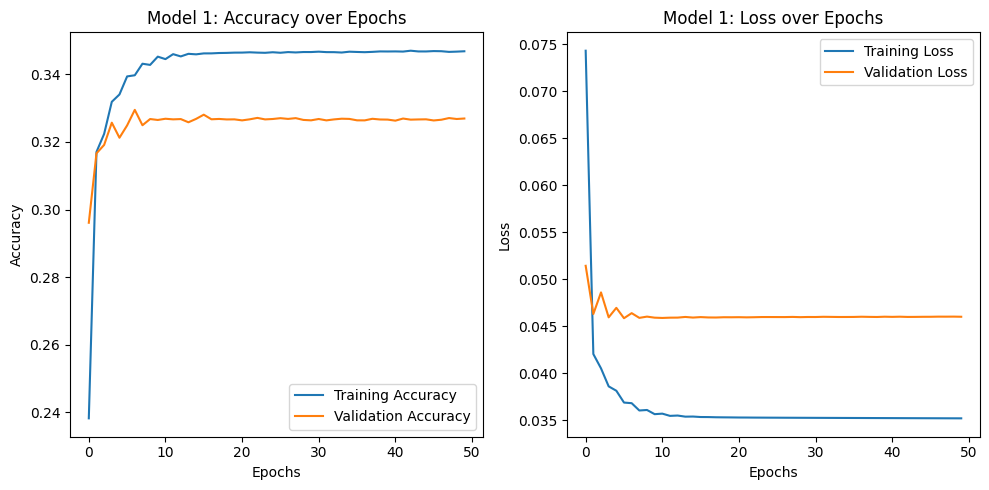

Evaluating Model Performance - 1
4396/4396 [==============================] - 5s 1ms/step
TP: 113364
FN: 141160
FP: 51789
TN: 12071855
Evaluation Complete - 1
Building model 2 with 2 layers...
Model 2: Adding 1st layer of 256 units
Model 2: Adding 2th layer of 256 units
Model 2: Adding classification layer
Model 2: Training...
Epoch 1/50
1065/1067 [============================>.] - ETA: 0s - loss: 0.0713 - accuracy: 0.2313
Epoch 1: saving model to /content/checkpoints/weights_2_layers_model_2.hdf5
1067/1067 [==============================] - 6s 6ms/step - loss: 0.0713 - accuracy: 0.2313 - val_loss: 0.0579 - val_accuracy: 0.2739
Epoch 2/50
1060/1067 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.3070
Epoch 2: saving model to /content/checkpoints/weights_2_layers_model_2.hdf5
1067/1067 [==============================] - 6s 5ms/step - loss: 0.0438 - accuracy: 0.3071 - val_loss: 0.0487 - val_accuracy: 0.3084
Epoch 3/50
1064/1067 [============================>.] - E

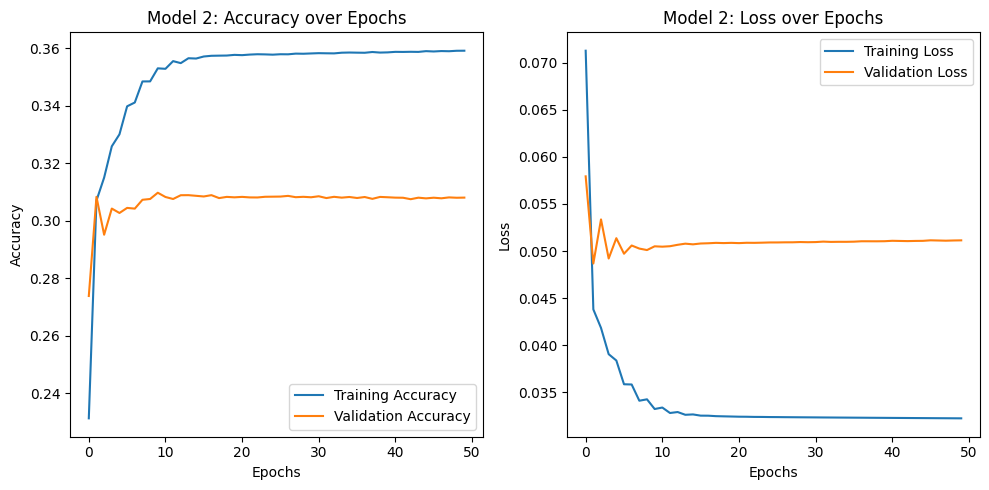

Evaluating Model Performance - 2
4396/4396 [==============================] - 5s 1ms/step
TP: 112234
FN: 142290
FP: 60087
TN: 12063557
Evaluation Complete - 2
Building model 3 with 3 layers...
Model 3: Adding 1st layer of 256 units
Model 3: Adding 2th layer of 256 units
Model 3: Adding 3th layer of 256 units
Model 3: Adding classification layer
Model 3: Training...
Epoch 1/50
1066/1067 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.1943
Epoch 1: saving model to /content/checkpoints/weights_3_layers_model_3.hdf5
1067/1067 [==============================] - 8s 7ms/step - loss: 0.0756 - accuracy: 0.1943 - val_loss: 0.0638 - val_accuracy: 0.2186
Epoch 2/50
1067/1067 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.2807
Epoch 2: saving model to /content/checkpoints/weights_3_layers_model_3.hdf5
1067/1067 [==============================] - 7s 6ms/step - loss: 0.0487 - accuracy: 0.2807 - val_loss: 0.0513 - val_accuracy: 0.2902
Epoch 3/50
1065/10

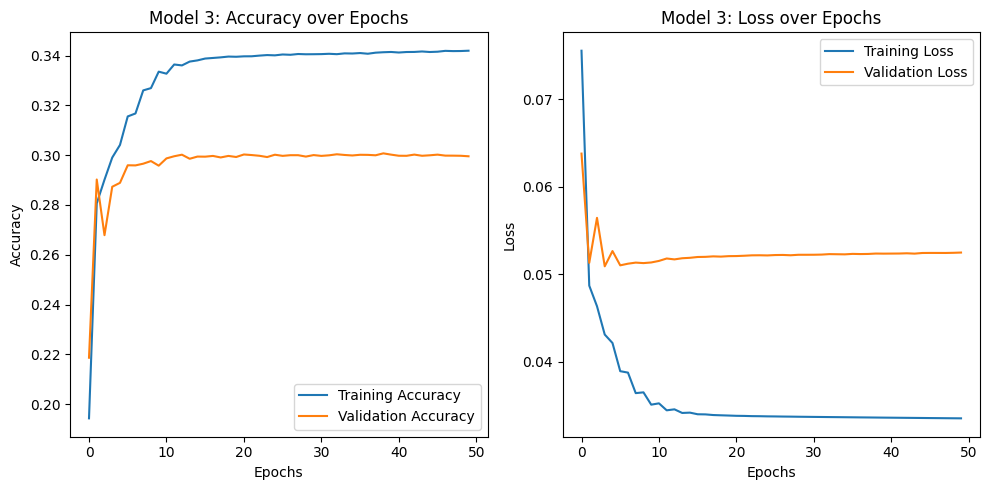

Evaluating Model Performance - 3
4396/4396 [==============================] - 5s 1ms/step
TP: 108327
FN: 146197
FP: 59223
TN: 12064421
Evaluation Complete - 3
Building model 4 with 4 layers...
Model 4: Adding 1st layer of 256 units
Model 4: Adding 2th layer of 256 units
Model 4: Adding 3th layer of 256 units
Model 4: Adding 4th layer of 256 units
Model 4: Adding classification layer
Model 4: Training...
Epoch 1/50
1063/1067 [============================>.] - ETA: 0s - loss: 0.0822 - accuracy: 0.1473
Epoch 1: saving model to /content/checkpoints/weights_4_layers_model_4.hdf5
1067/1067 [==============================] - 9s 8ms/step - loss: 0.0822 - accuracy: 0.1475 - val_loss: 0.0764 - val_accuracy: 0.1566
Epoch 2/50
1064/1067 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.2424
Epoch 2: saving model to /content/checkpoints/weights_4_layers_model_4.hdf5
1067/1067 [==============================] - 8s 8ms/step - loss: 0.0561 - accuracy: 0.2425 - val_loss: 0.0563 - 

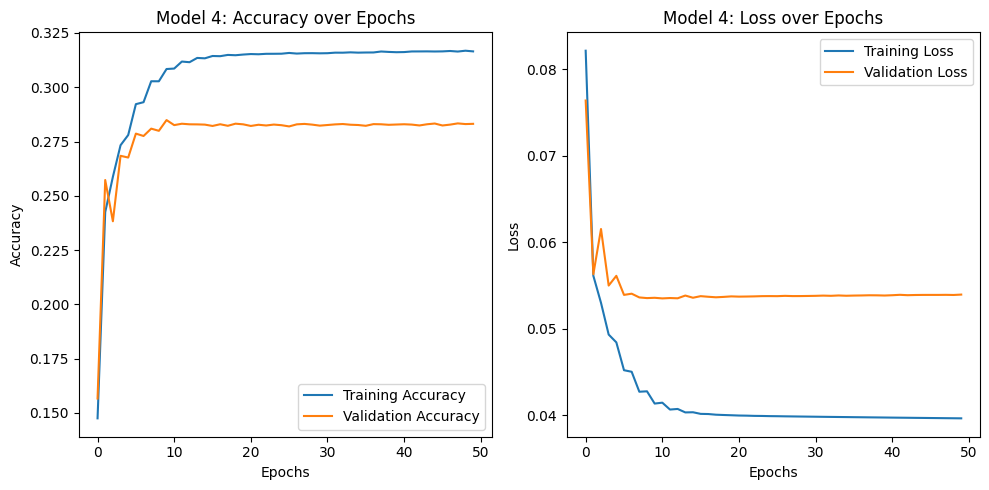

Evaluating Model Performance - 4
4396/4396 [==============================] - 5s 1ms/step
TP: 94845
FN: 159679
FP: 52502
TN: 12071142
Evaluation Complete - 4


In [ ]:
#Model Training 1-4 Layers
results = []
model_train_diff_layers(min_layers=1, max_layers=4)

In [ ]:
results_df = pd.DataFrame(results, columns=["Model #", "No of layers", "Accuracy", "Precision", "Recall", "F-Measure"])
print(results_df)
results_df.to_csv('NeuralNetworkBaseResults.csv',index=False)

  Model #  No of layers   Accuracy  Precision     Recall  F-Measure
0       1             1  37.009203  68.641805  44.539611  54.024404
1       2             2  35.673896  65.130773  44.095645  52.587707
2       3             3  34.526864  64.653536  42.560623  51.330809
3       4             4  30.891521  64.368464  37.263677  47.201714


**Since Layer 1 is the best we will add some hyper param tuning towards it. Following the principle of Successive Halving we will only be running it for 100 epochs instead of 500.**

#HYPER PARAM TUNING BASE LAYER

In [ ]:
#MODEL TRAINING WITHOUT ANY HYPERPARAMS ONLY LR
import numpy as np
import pandas as pd
import threading
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History, ModelCheckpoint
import keras
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.backend import clear_session

np.random.seed(999)

def evaluate_and_store_results(model_num, dropout_rate, mini_batch_size, model, X_test, y_test):
    """Evaluate the model and store the results in a global DataFrame."""
    print(f"Evaluating Model Performance - {model_num}: Dropout:{dropout_rate} Batch_Size: {mini_batch_size}")
    predictions = model.predict(X_test).round()
    TP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 1))
    FN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 1))
    FP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 0))
    TN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 0))

    recall = TP / float(TP + FN)
    precision = TP / float(TP + FP)
    accuracy = TP / float(TP + FP + FN)
    F1_Score = 100 * 2 * precision * recall / (precision + recall)

    print(f"TP: {TP}")
    print(f"FN: {FN}")
    print(f"FP: {FP}")
    print(f"TN: {TN}")
    accuracy_pct = accuracy * 100
    precision_pct = precision * 100
    recall_pct = recall * 100

    # Log results
    grid_search_results.append([f"{model_num}", dropout_rate, mini_batch_size, accuracy_pct, precision_pct, recall_pct, F1_Score])
    print(f"Evaluation Complete - {model_num}: Dropout:{dropout_rate} Batch_Size: {mini_batch_size}")

def train_and_evaluate_model(dropout_rate, mini_batch_size, model_num):
    """Train a model and then evaluate it, storing the results in a global DataFrame."""
    num_epochs = 50
    input_size = 252
    number_units = 256
    number_classes = 88

    print(f"Building model {model_num} with a dropout rate of {dropout_rate} and minibatch size of {mini_batch_size}...")
    model = Sequential()
    history = History()

    # Add the input layer
    print(f"Model {model_num}: Adding 1st layer of {number_units} units")
    model.add(Dense(number_units, input_shape=(input_size,), kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))

    # Add classification layer
    print(f"Model {model_num}: Adding classification layer")
    model.add(Dense(number_classes, kernel_initializer='normal', activation='sigmoid'))

    # Configure a cyclical learning rate
    clr_schedule = CyclicalLearningRate(
        initial_learning_rate=1e-4,
        maximal_learning_rate=0.1,
        step_size=1000,
        scale_fn=lambda x: 1/(2.0**(x - 1)),
        scale_mode='cycle'
    )
    optimizer = keras.optimizers.Adam(learning_rate=clr_schedule)

    # Compile the model with binary cross-entropy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Model checkpoint for saving weights
    checkpointer = ModelCheckpoint(
        filepath=f'/content/checkpoints/weights_dropout_{dropout_rate}_batch_{mini_batch_size}_model_{model_num}.hdf5',
        verbose=1,
        save_best_only=False
    )
    early = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='auto')

    # Train the model
    print(f"Model {model_num}: Training with dropout rate {dropout_rate} and minibatch size {mini_batch_size}...")
    model.fit(
        np.array(norm_train_X), np.array(train_labels),
        batch_size=mini_batch_size, epochs=num_epochs,
        validation_data=(np.array(norm_val_X), np.array(val_labels)),
        verbose=1, callbacks=[checkpointer,early]
    )

    # Load weights for evaluation (if necessary)
    model.load_weights(f'/content/checkpoints/weights_dropout_{dropout_rate}_batch_{mini_batch_size}_model_{model_num}.hdf5')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Evaluate and store results
    evaluate_and_store_results(model_num, dropout_rate, mini_batch_size, model, np.array(norm_train_X), np.array(test_labels))
    clear_session()

def model_train_diff_layers(dropout_rates=[0.05, 0.1, 0.2], minibatch_sizes=[32, 64, 128]):
    """Train and evaluate models with different dropout rates and minibatch sizes."""
    model_num = 1
    for dropout_rate in dropout_rates:
        for mini_batch_size in minibatch_sizes:
            train_and_evaluate_model(dropout_rate, mini_batch_size, model_num)
            model_num += 1

In [ ]:
grid_search_results = []
model_train_diff_layers(dropout_rates=[0.05, 0.15, 0.25], minibatch_sizes=[250, 500, 1000, 1500])

Building model 1 with a dropout rate of 0.05 and minibatch size of 250...
Model 1: Adding 1st layer of 256 units
Model 1: Adding classification layer
Model 1: Training with dropout rate 0.05 and minibatch size 250...
Epoch 1/50
2121/2133 [============================>.] - ETA: 0s - loss: 0.0608 - accuracy: 0.2676
Epoch 1: saving model to /content/checkpoints/weights_dropout_0.05_batch_250_model_1.hdf5
2133/2133 [==============================] - 10s 4ms/step - loss: 0.0607 - accuracy: 0.2679 - val_loss: 0.0472 - val_accuracy: 0.3146
Epoch 2/50
2124/2133 [============================>.] - ETA: 0s - loss: 0.0420 - accuracy: 0.3175
Epoch 2: saving model to /content/checkpoints/weights_dropout_0.05_batch_250_model_1.hdf5
2133/2133 [==============================] - 9s 4ms/step - loss: 0.0420 - accuracy: 0.3176 - val_loss: 0.0463 - val_accuracy: 0.3217
Epoch 3/50
2126/2133 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.3265
Epoch 3: saving model to /content/checkpoi

In [ ]:
results_df_grid = pd.DataFrame(grid_search_results, columns=["Model #", "Dropout","Batch Size", "Accuracy", "Precision", "Recall", "F-Measure"])
print(results_df_grid)
results_df_grid.to_csv('NeuralNetworkGridResults.csv',index=False)

   Model #  Dropout  Batch Size   Accuracy  Precision     Recall  F-Measure
0        1     0.05         250  36.002978  70.047081  42.554337  52.944397
1        2     0.05         500  36.543482  69.986738  43.334617  53.526513
2        3     0.05        1000  36.892339  70.098067  43.782512  53.899786
3        4     0.05        1500  37.320427  69.914555  44.460640  54.355245
4        5     0.15         250  34.511051  70.896520  40.207210  51.313332
5        6     0.15         500  35.502829  71.178061  41.463673  52.401606
6        7     0.15        1000  35.790320  70.896295  41.954393  52.714097
7        8     0.15        1500  36.131431  71.121244  42.343748  53.083157
8        9     0.25         250  32.528703  71.562754  37.357577  49.089295
9       10     0.25         500  33.833517  71.907043  38.986893  50.560604
10      11     0.25        1000  34.603880  71.954822  39.998586  51.415873
11      12     0.25        1500  34.540527  72.147937  39.854788  51.345907


#RERUN LAYER1-4 WITH BEST PARAMS
DROPOUT - 0.05
Batch Size - 1500

In [ ]:
# Training 1-4 with best params
import numpy as np
import pandas as pd
import threading
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History, ModelCheckpoint
import keras
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt

np.random.seed(999)
def plot_training(history, model_num):
    """Plot training/validation accuracy and loss over epochs."""
    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {model_num} Dropout - 0.05, Batch Size - 1500:\n Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_num} Dropout - 0.05, Batch Size - 1500:\n Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def train_and_evaluate_model2(num_layers, model_num):
    """Train a model and then evaluate it, storing the results in a global DataFrame."""
    mini_batch_size = 1500
    num_epochs = 50
    input_size = 252
    number_units = 256
    number_classes = 88

    print(f"Building model {model_num} with {num_layers} layers...")
    model = Sequential()
    history = History()

    # Add the input layer
    print(f"Model {model_num}: Adding 1st layer of {number_units} units")
    model.add(Dense(number_units, input_shape=(input_size,), kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.05))
    # Add hidden layers
    for i in range(1, num_layers):
        print(f"Model {model_num}: Adding {i + 1}th layer of {number_units} units")
        model.add(Dense(number_units, kernel_initializer='normal', activation='relu'))
        model.add(Dropout(0.05))
    # Add classification layer
    print(f"Model {model_num}: Adding classification layer")
    model.add(Dense(number_classes, kernel_initializer='normal', activation='sigmoid'))

    # Configure a cyclical learning rate
    clr_schedule = CyclicalLearningRate(
        initial_learning_rate=1e-4,
        maximal_learning_rate=0.1,
        step_size=1000,
        scale_fn=lambda x: 1/(2.0**(x - 1)),
        scale_mode='cycle'
    )
    optimizer = keras.optimizers.Adam(learning_rate=clr_schedule)

    # Compile the model with binary cross-entropy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Model checkpoint for saving weights
    checkpointer = ModelCheckpoint(
        filepath=f'/content/checkpoints/weights_dropout_0.05_model_{model_num}_tuned.hdf5',
        verbose=1,
        save_best_only=False
    )
    # early = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='auto')
    # Train the model
    print(f"Model {model_num}: Training...")
    history = model.fit(
        np.array(norm_train_X), np.array(train_labels),
        batch_size=mini_batch_size, epochs=num_epochs,
        validation_data=(np.array(norm_val_X), np.array(val_labels)),
        verbose=1, callbacks=[checkpointer]
    )
    plot_training(history, model_num)
    # Load weights for evaluation (if necessary)
    model.load_weights(f'/content/checkpoints/weights_dropout_0.05_model_{model_num}_tuned.hdf5')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Evaluate and store results
    evaluate_and_store_results2(model_num, num_layers, model, np.array(norm_test_X), np.array(test_labels))
    clear_session() #CLear model cache

def evaluate_and_store_results2(model_num, num_layers, model, X_test, y_test):
    """Evaluate the model and store the results in a global DataFrame."""
    print(f"Evaluating Model Performance - {model_num}")
    predictions = model.predict(X_test).round()
    TP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 1))
    FN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 1))
    FP = np.count_nonzero(np.logical_and(predictions == 1, y_test == 0))
    TN = np.count_nonzero(np.logical_and(predictions == 0, y_test == 0))

    recall = TP / float(TP + FN)
    precision = TP / float(TP + FP)
    accuracy = TP / float(TP + FP + FN)
    F1_Score = 100 * 2 * precision * recall / (precision + recall)

    print(f"TP: {TP}")
    print(f"FN: {FN}")
    print(f"FP: {FP}")
    print(f"TN: {TN}")
    accuracy_pct = accuracy * 100
    precision_pct = precision * 100
    recall_pct = recall * 100
    # Log results
    results_tuned.append([f"{model_num}", num_layers, accuracy_pct, precision_pct, recall_pct, F1_Score])
    print(results_tuned)
    print(f"Evaluation Complete - {model_num}")


def model_train_diff_layers(min_layers=1, max_layers=4):
    """Train and evaluate models with different layer configurations."""
    for model_num, num_layers in enumerate(range(min_layers, max_layers + 1), start=1):
        train_and_evaluate_model2(num_layers, model_num)

Building model 1 with 1 layers...
Model 1: Adding 1st layer of 256 units
Model 1: Adding classification layer
Model 1: Training...
Epoch 1/50
356/356 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.1553
Epoch 1: saving model to /content/checkpoints/weights_dropout_0.05_model_1_tuned.hdf5
356/356 [==============================] - 4s 9ms/step - loss: 0.1237 - accuracy: 0.1553 - val_loss: 0.0570 - val_accuracy: 0.2594
Epoch 2/50
350/356 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.2822
Epoch 2: saving model to /content/checkpoints/weights_dropout_0.05_model_1_tuned.hdf5
356/356 [==============================] - 3s 8ms/step - loss: 0.0492 - accuracy: 0.2823 - val_loss: 0.0509 - val_accuracy: 0.2855
Epoch 3/50
354/356 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.3025
Epoch 3: saving model to /content/checkpoints/weights_dropout_0.05_model_1_tuned.hdf5
356/356 [==============================] - 3s 9ms/step - loss

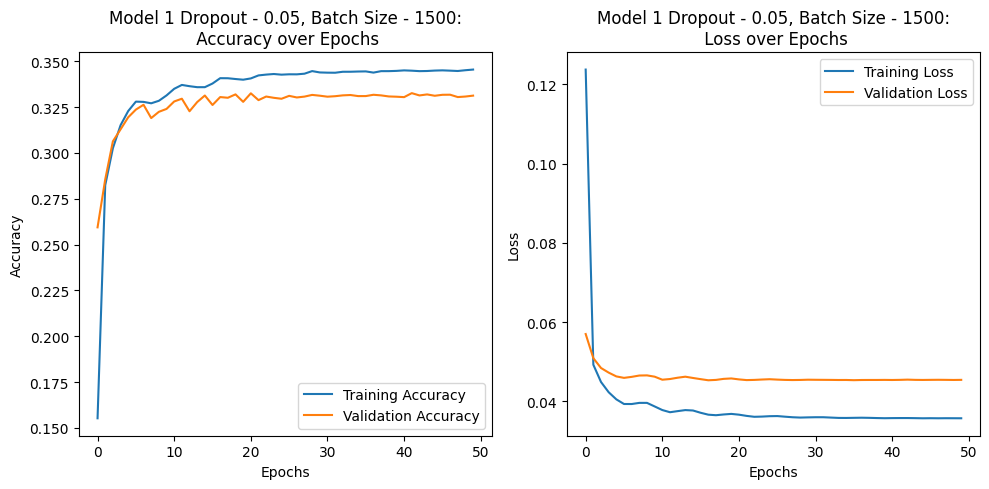

Evaluating Model Performance - 1
4396/4396 [==============================] - 5s 1ms/step
TP: 112223
FN: 142301
FP: 48273
TN: 12075371
[['1', 1, 37.062124129367206, 69.92261489382912, 44.091323411544685, 54.080767191942556]]
Evaluation Complete - 1
Building model 2 with 2 layers...
Model 2: Adding 1st layer of 256 units
Model 2: Adding 2th layer of 256 units
Model 2: Adding classification layer
Model 2: Training...
Epoch 1/50
354/356 [============================>.] - ETA: 0s - loss: 0.1109 - accuracy: 0.1482
Epoch 1: saving model to /content/checkpoints/weights_dropout_0.05_model_2_tuned.hdf5
356/356 [==============================] - 5s 13ms/step - loss: 0.1107 - accuracy: 0.1488 - val_loss: 0.0552 - val_accuracy: 0.2595
Epoch 2/50
353/356 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.2844
Epoch 2: saving model to /content/checkpoints/weights_dropout_0.05_model_2_tuned.hdf5
356/356 [==============================] - 4s 13ms/step - loss: 0.0485 - accuracy: 0.

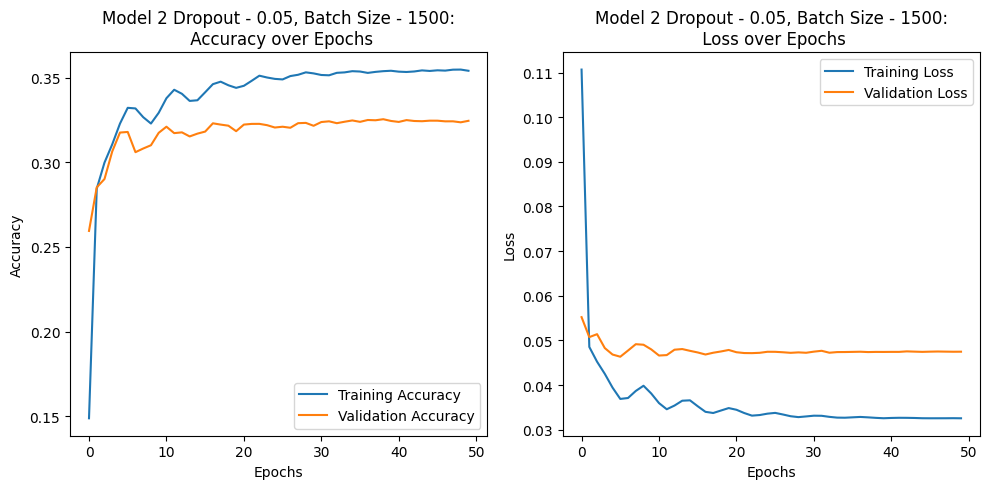

Evaluating Model Performance - 2
4396/4396 [==============================] - 5s 1ms/step
TP: 117168
FN: 137356
FP: 57188
TN: 12066456
[['1', 1, 37.062124129367206, 69.92261489382912, 44.091323411544685, 54.080767191942556], ['2', 2, 37.588543270711426, 67.20044047810228, 46.03416573682639, 54.63905987688864]]
Evaluation Complete - 2
Building model 3 with 3 layers...
Model 3: Adding 1st layer of 256 units
Model 3: Adding 2th layer of 256 units
Model 3: Adding 3th layer of 256 units
Model 3: Adding classification layer
Model 3: Training...
Epoch 1/50
355/356 [============================>.] - ETA: 0s - loss: 0.1129 - accuracy: 0.1031
Epoch 1: saving model to /content/checkpoints/weights_dropout_0.05_model_3_tuned.hdf5
356/356 [==============================] - 7s 17ms/step - loss: 0.1128 - accuracy: 0.1032 - val_loss: 0.0595 - val_accuracy: 0.2282
Epoch 2/50
353/356 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.2606
Epoch 2: saving model to /content/checkpoints

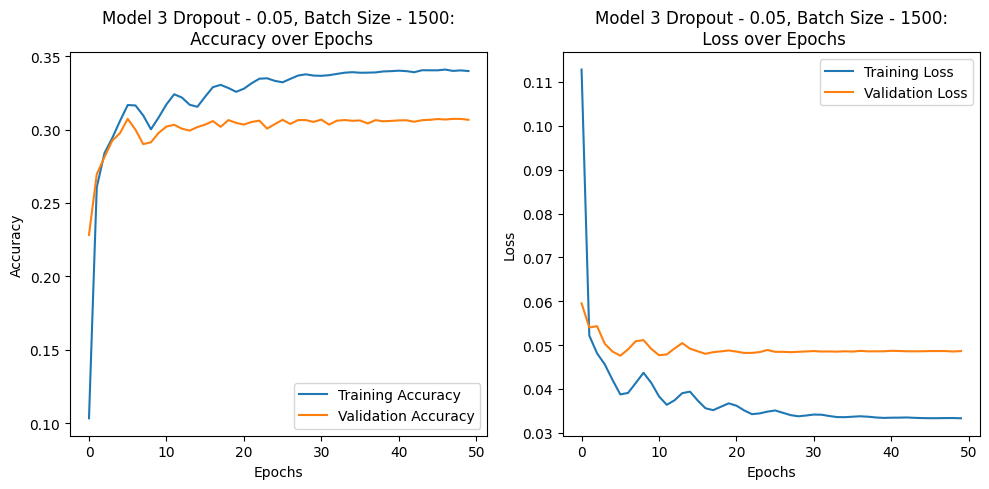

Evaluating Model Performance - 3
4396/4396 [==============================] - 5s 1ms/step
TP: 113422
FN: 141102
FP: 55537
TN: 12068107
[['1', 1, 37.062124129367206, 69.92261489382912, 44.091323411544685, 54.080767191942556], ['2', 2, 37.588543270711426, 67.20044047810228, 46.03416573682639, 54.63905987688864], ['3', 3, 36.580543828472464, 67.12989541841512, 44.562398830758596, 53.56625885808876]]
Evaluation Complete - 3
Building model 4 with 4 layers...
Model 4: Adding 1st layer of 256 units
Model 4: Adding 2th layer of 256 units
Model 4: Adding 3th layer of 256 units
Model 4: Adding 4th layer of 256 units
Model 4: Adding classification layer
Model 4: Training...
Epoch 1/50
355/356 [============================>.] - ETA: 0s - loss: 0.1187 - accuracy: 0.0432
Epoch 1: saving model to /content/checkpoints/weights_dropout_0.05_model_4_tuned.hdf5
356/356 [==============================] - 8s 21ms/step - loss: 0.1186 - accuracy: 0.0433 - val_loss: 0.0738 - val_accuracy: 0.1012
Epoch 2/50
355

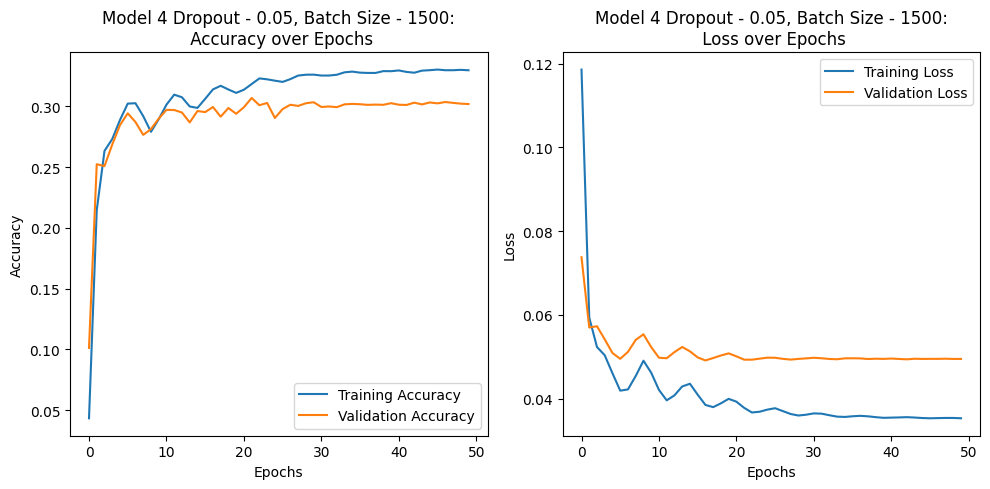

Evaluating Model Performance - 4
4396/4396 [==============================] - 6s 1ms/step
TP: 109182
FN: 145342
FP: 53936
TN: 12069708
[['1', 1, 37.062124129367206, 69.92261489382912, 44.091323411544685, 54.080767191942556], ['2', 2, 37.588543270711426, 67.20044047810228, 46.03416573682639, 54.63905987688864], ['3', 3, 36.580543828472464, 67.12989541841512, 44.562398830758596, 53.56625885808876], ['4', 4, 35.39583738572262, 66.93436653220368, 42.89654413729157, 52.284971339089466]]
Evaluation Complete - 4


In [ ]:
results_tuned = []
model_train_diff_layers(min_layers=1, max_layers=4)

In [ ]:
results_df_tuned = pd.DataFrame(results_tuned, columns=["Model #", "No of layers", "Accuracy", "Precision", "Recall", "F-Measure"])
print(results_df_tuned)
results_df_tuned.to_csv('NeuralNetworkTunedResults.csv',index=False)

  Model #  No of layers   Accuracy  Precision     Recall  F-Measure
0       1             1  37.062124  69.922615  44.091323  54.080767
1       2             2  37.588543  67.200440  46.034166  54.639060
2       3             3  36.580544  67.129895  44.562399  53.566259
3       4             4  35.395837  66.934367  42.896544  52.284971


#Model prediction visualization

In [ ]:
# Load model and compile it with optimizer and loss function
model.load_weights('weights_3_layers_model_3_tuned.hdf5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_test = np.array(norm_test_X)
y_test = np.array(test_labels)

# Predict using the loaded model and round predictions to binary values
predictions = model.predict(X_test).round()
print(f"Predictions (rounded): {predictions}")
print(f"True Test Labels: {y_test}")

4396/4396 [==============================] - 6s 1ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


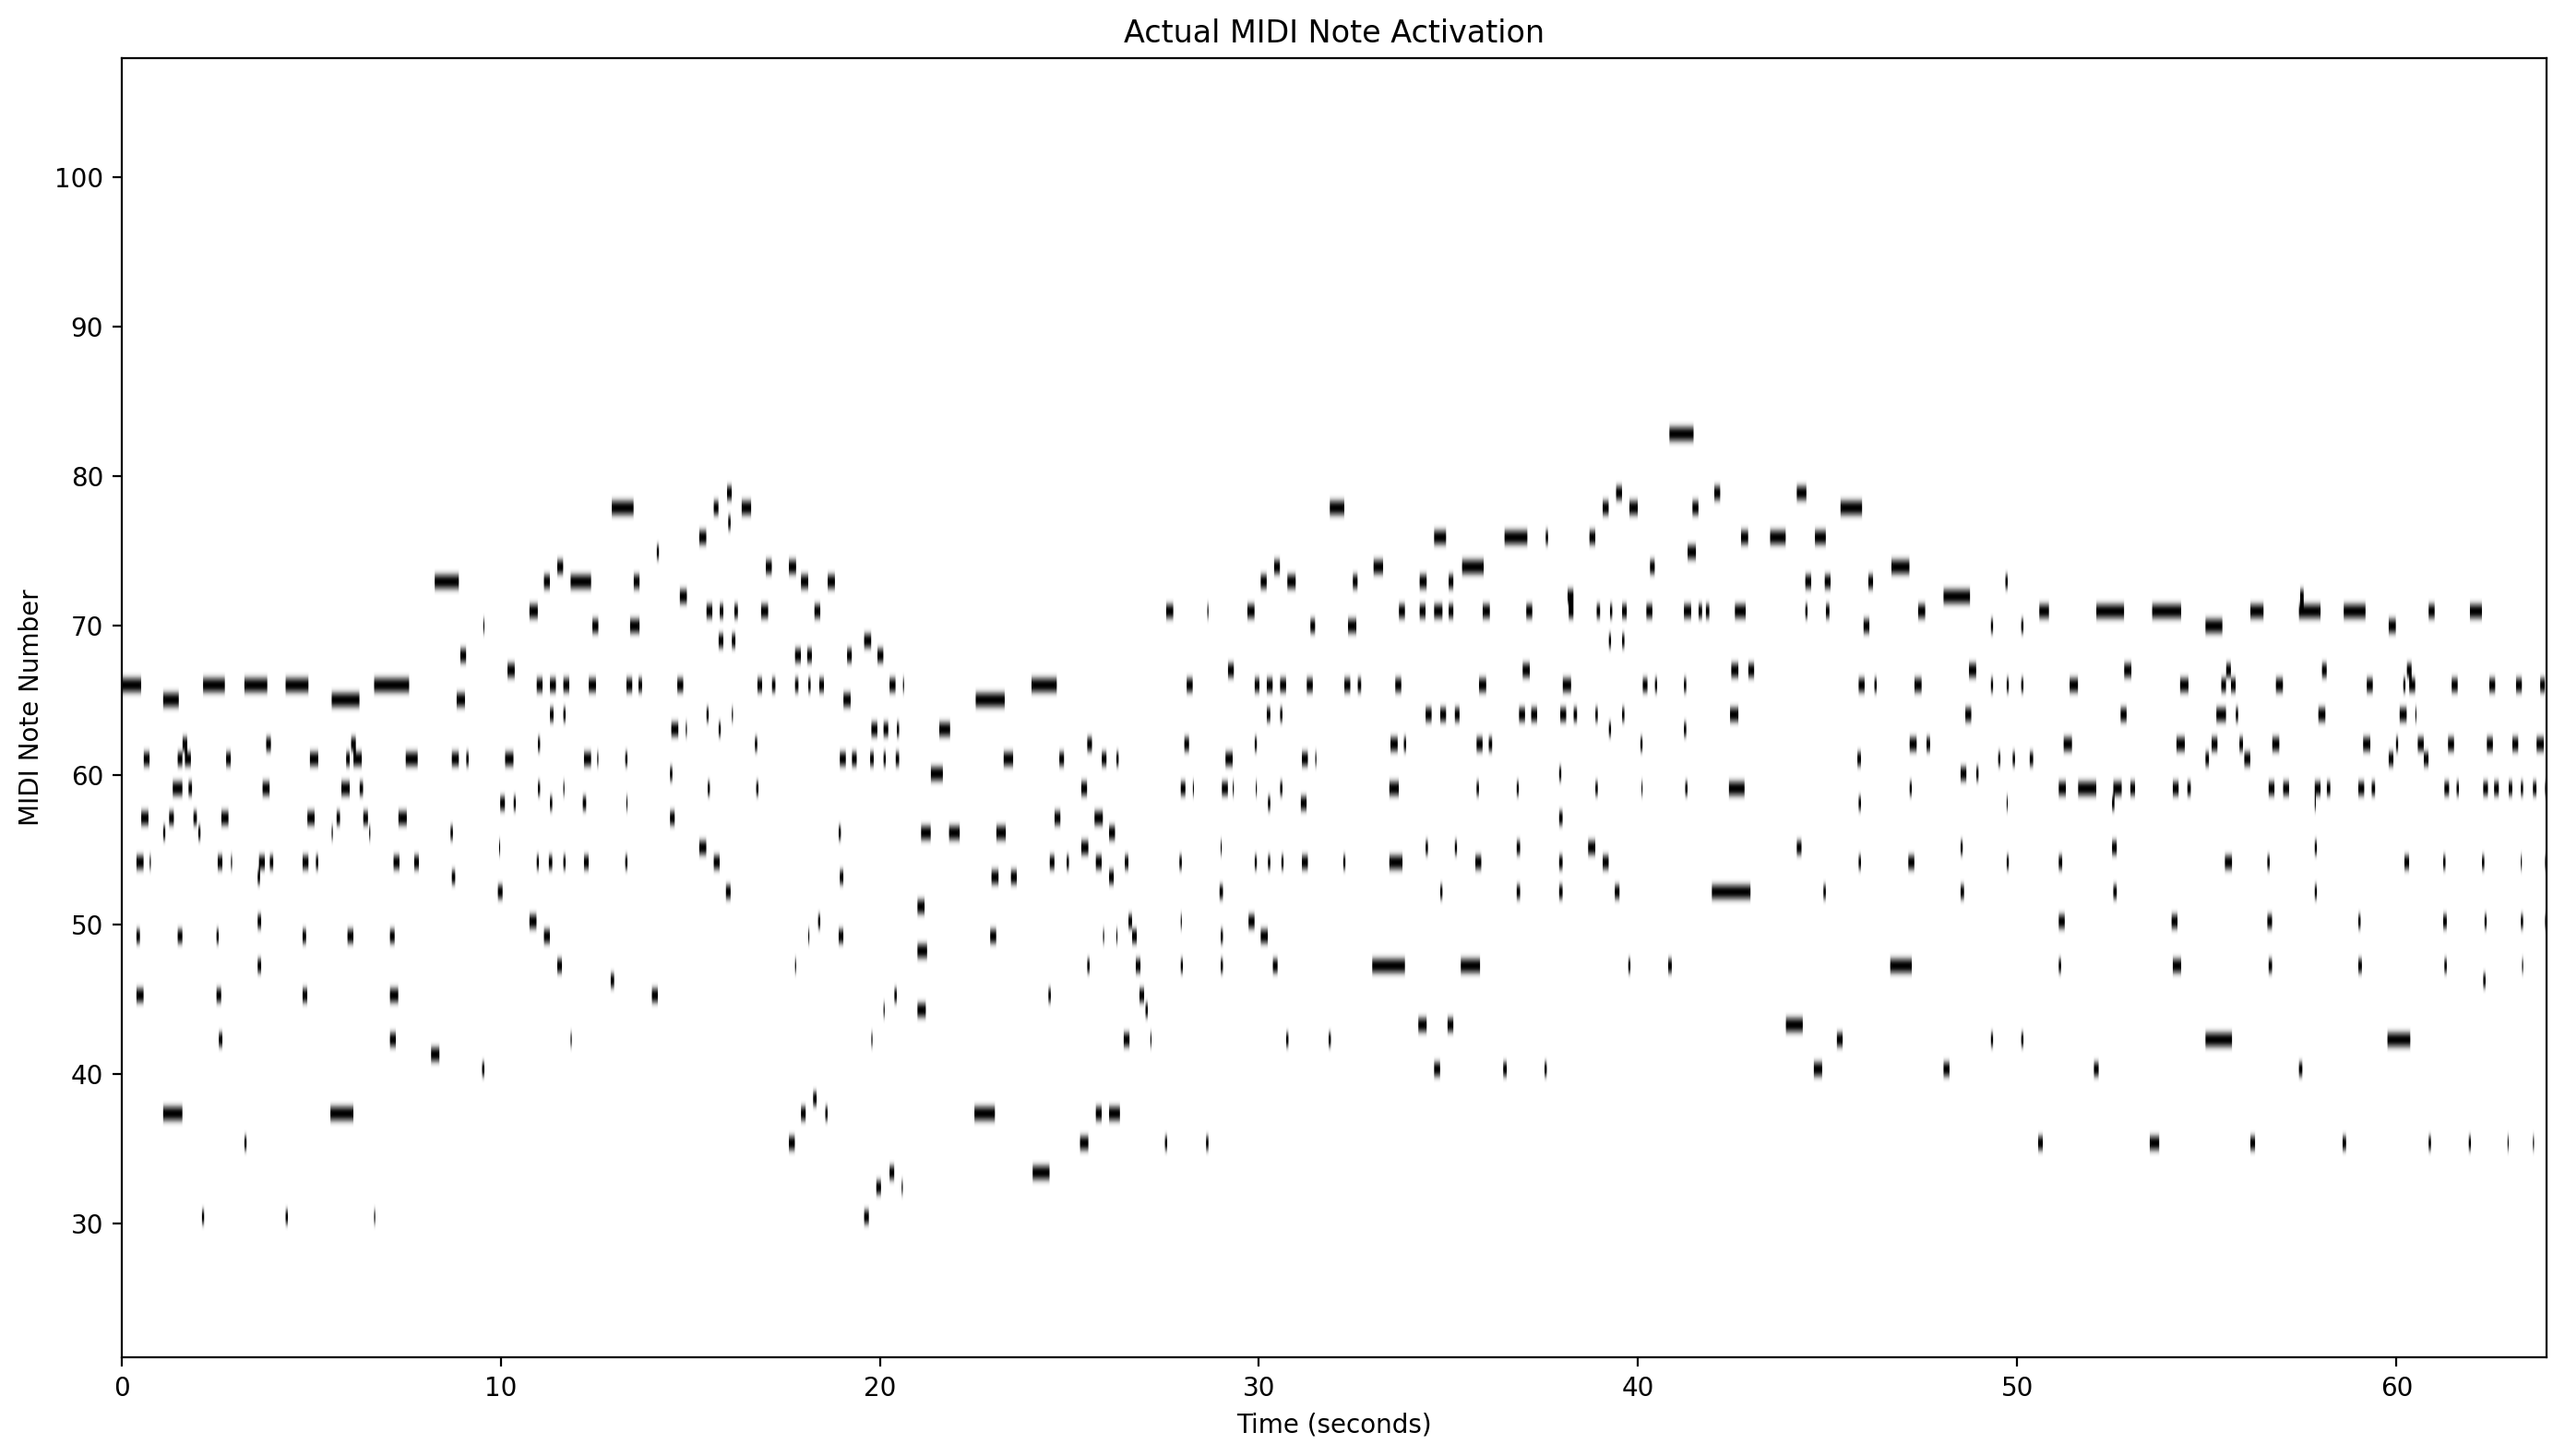

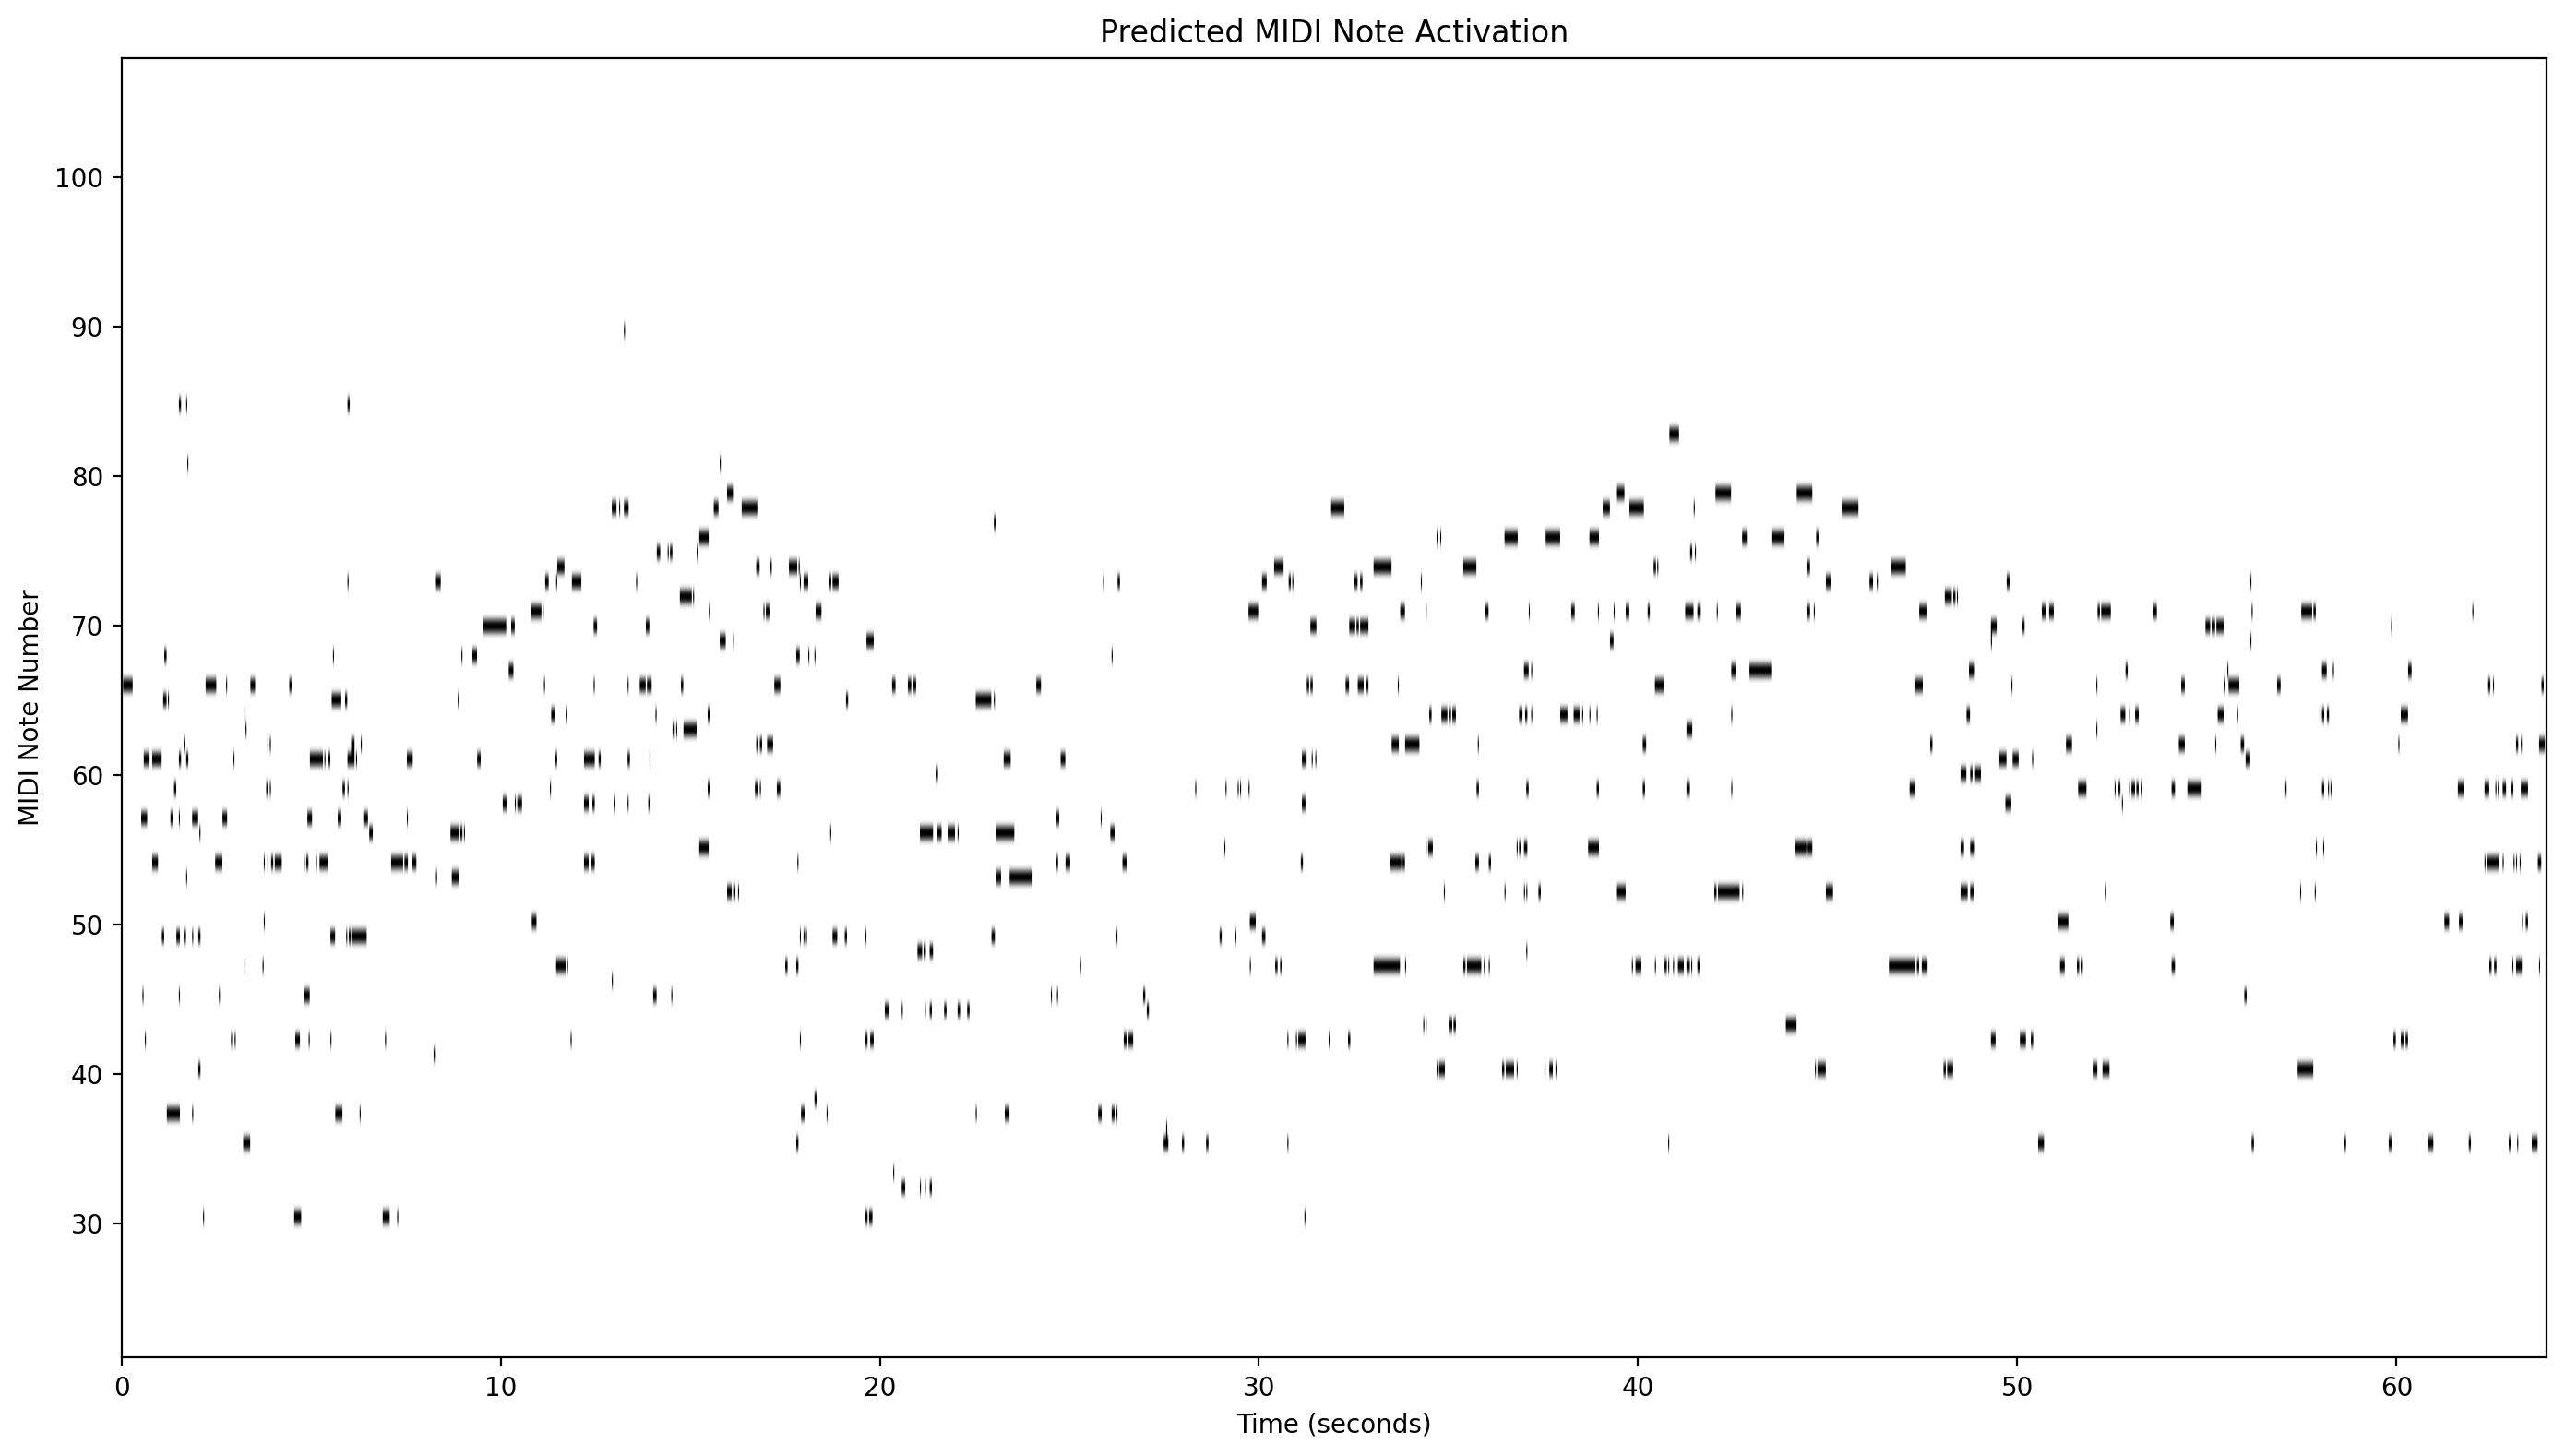

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_test_subset = y_test[60000:62000]
predictions_subset = predictions[60000:62000]

# Calculate the time axis: each frame represents 32 milliseconds
time_axis = np.arange(len(y_test_subset)) * 32 / 1000  # in seconds

# Function to create a piano roll matrix for visualization
def create_piano_roll(y_subset):
    piano_roll = np.zeros((88, len(y_subset)))
    for i, frame in enumerate(y_subset):
        for note_slot, is_played in enumerate(frame):
            if is_played:  # If the note is active
                midi_note = note_slot + 21  # Map slot to actual MIDI note number
                piano_roll[note_slot, i] = 1  # Activate this note in the piano roll
    return piano_roll

# Create piano roll matrices for both ground truth and predictions
piano_roll_actual = create_piano_roll(y_test_subset)
piano_roll_predicted = create_piano_roll(predictions_subset)

# Plot the actual notes in a separate figure
plt.figure(figsize=(14, 8))
plt.imshow(piano_roll_actual, aspect='auto', cmap='Greys', origin='lower', extent=[time_axis[0], time_axis[-1], 21, 108])
plt.title('Actual MIDI Note Activation')
plt.xlabel('Time (seconds)')
plt.ylabel('MIDI Note Number')
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot the predicted notes in a separate figure
plt.figure(figsize=(14, 8))
plt.imshow(piano_roll_predicted, aspect='auto', cmap='Greys', origin='lower', extent=[time_axis[0], time_axis[-1], 21, 108])
plt.title('Predicted MIDI Note Activation')
plt.xlabel('Time (seconds)')
plt.ylabel('MIDI Note Number')
plt.grid(False)
plt.tight_layout()
plt.show()


In [23]:
import pretty_midi
import numpy as np

def matrix_to_midi(matrix, frame_duration_ms, filename):
    """
    Convert a one-hot encoded matrix to a MIDI file.
    - matrix: 2D numpy array representing note activations
    - frame_duration_ms: duration of each frame in milliseconds
    - filename: the name of the output MIDI file
    """
    midi_data = pretty_midi.PrettyMIDI()
    piano = pretty_midi.Instrument(program=0)  # Acoustic Grand Piano

    # Iterate through each frame in the matrix
    for frame_idx, frame in enumerate(matrix):
        # Calculate start and end times for each frame
        start_time = frame_idx * frame_duration_ms / 1000
        end_time = start_time + frame_duration_ms / 1000

        # Add each activated note
        for note_idx, active in enumerate(frame):
            if active:
                midi_note = note_idx + 21  # Adjust note index to MIDI note range
                note = pretty_midi.Note(
                    velocity=100, pitch=midi_note, start=start_time, end=end_time
                )
                piano.notes.append(note)

    # Add the piano instrument to the MIDI data
    midi_data.instruments.append(piano)
    midi_data.write(f"{filename}.mid")

In [ ]:
frame_duration_ms = 32
y_test_subset = y_test[100000:102000]
predictions_subset = predictions[100000:102000]
matrix_to_midi(y_test_subset, frame_duration_ms, 'y_test_output100000')
matrix_to_midi(predictions_subset, frame_duration_ms, 'predictions_output100000')
print("MIDI files have been saved successfully as .mid files.")